In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# stops pandas from interpreting NA (the region) as missing value NaN and also makes it so any "-" becomes NaN
df = pd.read_csv("team_stats_s15.csv", keep_default_na=False, na_values = "-")

In [4]:
df.head()

,Name,Season,Region,Games,WinRate,KDA,GPM,GDM,GameDuration,KillsPerGame,...,TD@15,GD@15,PPG,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM
0,100 Thieves,S15,NA,33,57.6%,1.10,1860,63,34:21,16.7,...,0.0,120,3.64,0.82,63.4,32.6,2869,3.4,1.26,1.51
1,Anyone s Legend,S15,CN,89,68.5%,1.49,1926,154,32:57,18.4,...,NaN,503,NaN,0.72,66.0,33.7,2820,3.4,1.31,1.64
2,Bilibili Gaming,S15,CN,99,66.7%,1.31,1927,140,31:34,17.6,...,0.5,830,4.33,0.64,66.3,33.6,2777,3.3,1.29,1.55
3,BNK FearX,S15,KR,59,33.9%,0.77,1790,-112,30:53,12.8,...,0.0,-511,3.59,0.39,44.2,32.7,2615,3.4,1.33,1.44
4,Chiefs Esports Club,S15,OCE,33,15.2%,0.56,1680,-284,30:43,9.2,...,-0.4,-1460,2.52,0.30,24.0,32.4,2063,3.3,1.20,1.33


In [5]:
df.describe()

,Games,KDA,GPM,GDM,KillsPerGame,DeathsPerGame,TowersKilled,TowersLost,FB%,FT%,...,TD@15,GD@15,PPG,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,55.000000,54.000000,...,43.000000,57.000000,43.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,51.684211,0.946491,1809.473684,-48.649123,13.510526,14.870175,5.477193,6.494737,49.487273,47.572222,...,-0.074419,-221.473684,3.674651,0.525965,46.043860,33.114035,2537.789474,3.357895,1.275965,1.488421
std,26.756947,0.277382,75.567639,147.515797,2.489312,2.589123,1.403951,1.577795,9.336707,12.688851,...,0.320783,752.894536,0.758172,0.176016,15.428869,0.865910,221.014523,0.187985,0.112216,0.107101
min,2.000000,0.380000,1637.000000,-391.000000,6.000000,10.500000,1.500000,3.900000,25.000000,22.200000,...,-1.700000,-2619.000000,2.000000,0.000000,0.000000,31.000000,1669.000000,2.900000,1.020000,1.170000
25%,33.000000,0.730000,1761.000000,-145.000000,12.000000,13.000000,4.600000,5.300000,43.350000,39.175000,...,-0.150000,-558.000000,3.070000,0.400000,34.700000,32.600000,2407.000000,3.300000,1.200000,1.440000
50%,51.000000,0.930000,1821.000000,-50.000000,14.200000,14.900000,5.500000,6.400000,50.000000,48.650000,...,0.000000,-194.000000,3.630000,0.540000,50.000000,33.200000,2528.000000,3.400000,1.280000,1.500000
75%,73.000000,1.140000,1860.000000,67.000000,15.000000,16.200000,6.800000,7.400000,56.600000,55.150000,...,0.100000,441.000000,4.275000,0.660000,57.100000,33.700000,2664.000000,3.500000,1.350000,1.560000
max,105.000000,1.490000,1957.000000,222.000000,18.400000,24.000000,7.800000,11.000000,67.400000,73.800000,...,0.500000,830.000000,5.120000,1.000000,71.800000,34.800000,2960.000000,3.900000,1.540000,1.700000


In [6]:
print(df["Region"].unique())

['NA' 'CN' 'KR' 'OCE' 'TW' 'JP' 'EUW' 'LAT' 'VN']


In [7]:
df.loc[df["Region"].isin(["OCE", "TW", "JP", "VN"]), "Region"] = "APAC"

In [8]:
print(df["Region"].unique())

['NA' 'CN' 'KR' 'APAC' 'EUW' 'LAT']


In [9]:
df["FB%"] = df["FB%"].fillna(0)
df["FOS%"] = df["FOS%"].fillna(0)
df["FT%"] = df["FT%"].fillna(0)
df = df.dropna(axis=1)
df["FB%"] = (df["FB%"].astype(float)/100).round(3)
df["FT%"] = (df["FT%"].astype(float)/100).round(3)
df["FOS%"] = (df["FOS%"].astype(float)/100).round(3)
df["WinRate"] = (df["WinRate"].str.rstrip("%").astype(float)/100).round(3)
df["DRA%"] = (df["DRA%"].astype(float)/100).round(3)
df["NASH%"] = (df["NASH%"].astype(float)/100).round(3)
df["Season"] = df["Season"].str.lstrip("S").astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           57 non-null     object 
 1   Season         57 non-null     int64  
 2   Region         57 non-null     object 
 3   Games          57 non-null     int64  
 4   WinRate        57 non-null     float64
 5   KDA            57 non-null     float64
 6   GPM            57 non-null     int64  
 7   GDM            57 non-null     int64  
 8   GameDuration   57 non-null     object 
 9   KillsPerGame   57 non-null     float64
 10  DeathsPerGame  57 non-null     float64
 11  TowersKilled   57 non-null     float64
 12  TowersLost     57 non-null     float64
 13  FB%            57 non-null     float64
 14  FT%            57 non-null     float64
 15  FOS%           57 non-null     float64
 16  DRAPG          57 non-null     float64
 17  DRA%           57 non-null     float64
 18  VGPG        

In [11]:
df

,Name,Season,Region,Games,WinRate,KDA,GPM,GDM,GameDuration,KillsPerGame,...,VGPG,HER%,GD@15,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM
0,100 Thieves,15,NA,33,0.576,1.10,1860,63,34:21,16.7,...,2.3,57.6,120,0.82,0.634,32.6,2869,3.4,1.26,1.51
1,Anyone s Legend,15,CN,89,0.685,1.49,1926,154,32:57,18.4,...,2.5,54.5,503,0.72,0.660,33.7,2820,3.4,1.31,1.64
2,Bilibili Gaming,15,CN,99,0.667,1.31,1927,140,31:34,17.6,...,2.6,53.5,830,0.64,0.663,33.6,2777,3.3,1.29,1.55
3,BNK FearX,15,KR,59,0.339,0.77,1790,-112,30:53,12.8,...,2.7,44.1,-511,0.39,0.442,32.7,2615,3.4,1.33,1.44
4,Chiefs Esports Club,15,APAC,33,0.152,0.56,1680,-284,30:43,9.2,...,1.9,30.3,-1460,0.30,0.240,32.4,2063,3.3,1.20,1.33
5,Cloud9,15,NA,43,0.674,1.48,1915,157,32:59,15.9,...,2.2,51.2,567,0.79,0.685,34.6,2616,3.0,1.12,1.48
6,CTBC Flying Oyster,15,APAC,70,0.729,1.47,1925,187,31:47,15.4,...,2.5,52.2,725,0.60,0.682,34.1,2659,3.6,1.39,1.52
7,DetonatioN FocusMe,15,APAC,32,0.188,0.66,1717,-208,32:24,11.7,...,2.3,34.4,-443,0.28,0.250,31.7,2384,2.9,1.32,1.44
8,Dignitas,15,NA,28,0.286,0.73,1723,-152,35:05,10.9,...,2.4,42.9,-550,0.36,0.244,33.0,2405,3.3,1.21,1.41
9,Disguised,15,NA,20,0.100,0.38,1670,-317,32:24,8.1,...,2.4,40.0,-866,0.25,0.194,31.8,2360,3.6,1.45,1.30


array([[<Axes: title={'center': 'Season'}>,
        <Axes: title={'center': 'Games'}>,
        <Axes: title={'center': 'WinRate'}>,
        <Axes: title={'center': 'KDA'}>, <Axes: title={'center': 'GPM'}>],
       [<Axes: title={'center': 'GDM'}>,
        <Axes: title={'center': 'KillsPerGame'}>,
        <Axes: title={'center': 'DeathsPerGame'}>,
        <Axes: title={'center': 'TowersKilled'}>,
        <Axes: title={'center': 'TowersLost'}>],
       [<Axes: title={'center': 'FB%'}>, <Axes: title={'center': 'FT%'}>,
        <Axes: title={'center': 'FOS%'}>,
        <Axes: title={'center': 'DRAPG'}>,
        <Axes: title={'center': 'DRA%'}>],
       [<Axes: title={'center': 'VGPG'}>,
        <Axes: title={'center': 'HER%'}>,
        <Axes: title={'center': 'GD@15'}>,
        <Axes: title={'center': 'NASHPG'}>,
        <Axes: title={'center': 'NASH%'}>],
       [<Axes: title={'center': 'CSM'}>, <Axes: title={'center': 'DPM'}>,
        <Axes: title={'center': 'WPM'}>,
        <Axes: title

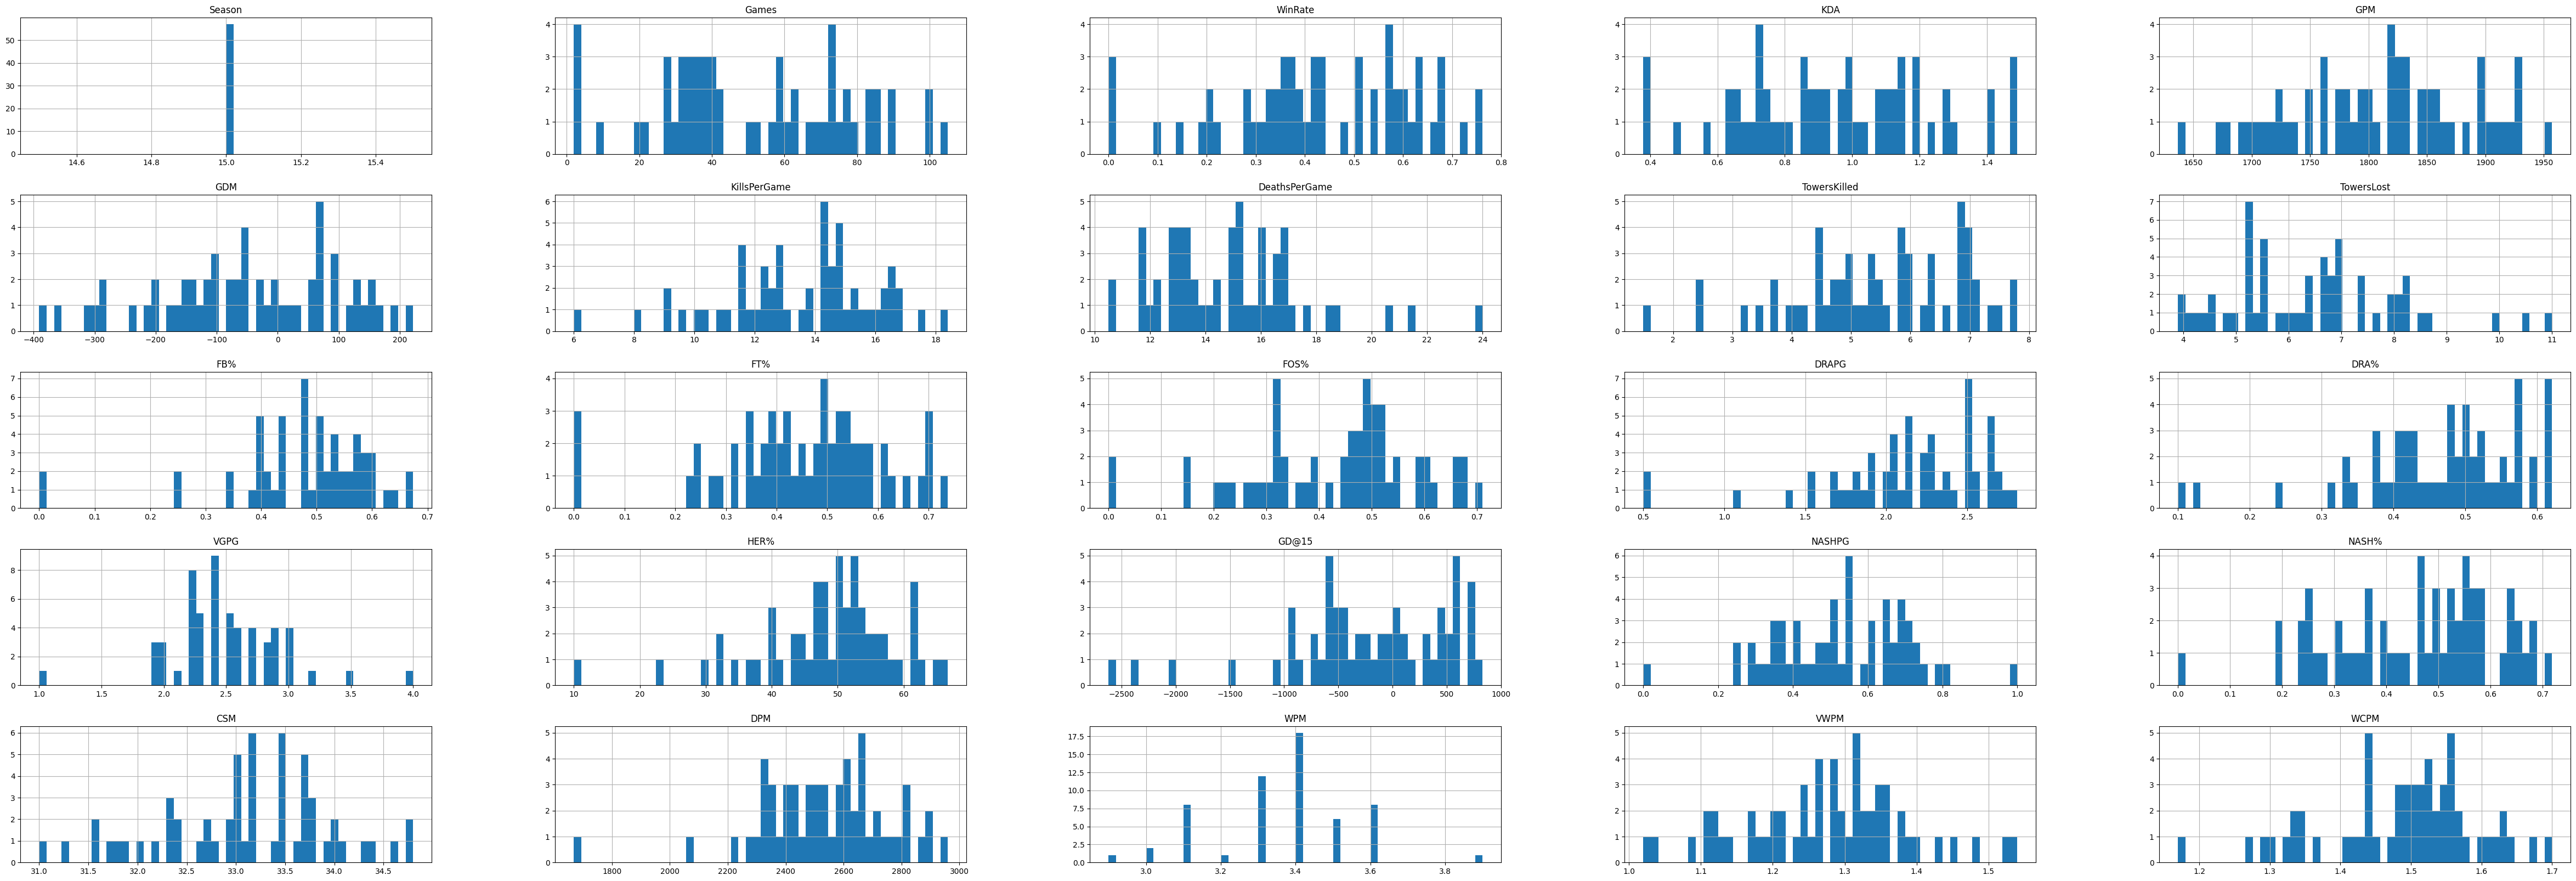

In [12]:
df.hist(bins=50, figsize=(60,20))

In [13]:
df["GameDuration"] = pd.to_timedelta("00:" + df["GameDuration"])
df["GameDuration"] = pd.to_timedelta(df["GameDuration"]).dt.total_seconds()


In [14]:
df["GameDuration"]

0     2061.0
1     1977.0
2     1894.0
3     1853.0
4     1843.0
5     1979.0
6     1907.0
7     1944.0
8     2105.0
9     1944.0
10    1959.0
11    1925.0
12    1955.0
13    2050.0
14    2012.0
15    1988.0
16    1894.0
17    1957.0
18    2000.0
19    1999.0
20    1998.0
21    1916.0
22    2056.0
23    1926.0
24    2013.0
25    2290.0
26    1972.0
27    1983.0
28    1925.0
29    2109.0
30    1980.0
31    1932.0
32    1747.0
33    2028.0
34    1954.0
35    2021.0
36    1975.0
37    1903.0
38    1950.0
39    1936.0
40    2134.0
41    2108.0
42    2021.0
43    2147.0
44    1892.0
45    1967.0
46    1940.0
47    2144.0
48    2005.0
49    1973.0
50    1936.0
51    2069.0
52    1944.0
53    1943.0
54    1845.0
55    1991.0
56    1962.0
Name: GameDuration, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           57 non-null     object 
 1   Season         57 non-null     int64  
 2   Region         57 non-null     object 
 3   Games          57 non-null     int64  
 4   WinRate        57 non-null     float64
 5   KDA            57 non-null     float64
 6   GPM            57 non-null     int64  
 7   GDM            57 non-null     int64  
 8   GameDuration   57 non-null     float64
 9   KillsPerGame   57 non-null     float64
 10  DeathsPerGame  57 non-null     float64
 11  TowersKilled   57 non-null     float64
 12  TowersLost     57 non-null     float64
 13  FB%            57 non-null     float64
 14  FT%            57 non-null     float64
 15  FOS%           57 non-null     float64
 16  DRAPG          57 non-null     float64
 17  DRA%           57 non-null     float64
 18  VGPG        

In [16]:
df.describe()

,Season,Games,WinRate,KDA,GPM,GDM,GameDuration,KillsPerGame,DeathsPerGame,TowersKilled,...,VGPG,HER%,GD@15,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM
count,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,15.0,51.684211,0.433825,0.946491,1809.473684,-48.649123,1980.368421,13.510526,14.870175,5.477193,...,2.489474,48.540351,-221.473684,0.525965,0.460439,33.114035,2537.789474,3.357895,1.275965,1.488421
std,0.0,26.756947,0.190143,0.277382,75.567639,147.515797,87.545627,2.489312,2.589123,1.403951,...,0.445086,10.470449,752.894536,0.176016,0.154289,0.865910,221.014523,0.187985,0.112216,0.107101
min,15.0,2.000000,0.000000,0.380000,1637.000000,-391.000000,1747.000000,6.000000,10.500000,1.500000,...,1.000000,10.000000,-2619.000000,0.000000,0.000000,31.000000,1669.000000,2.900000,1.020000,1.170000
25%,15.0,33.000000,0.333000,0.730000,1761.000000,-145.000000,1936.000000,12.000000,13.000000,4.600000,...,2.200000,44.100000,-558.000000,0.400000,0.347000,32.600000,2407.000000,3.300000,1.200000,1.440000
50%,15.0,51.000000,0.425000,0.930000,1821.000000,-50.000000,1972.000000,14.200000,14.900000,5.500000,...,2.400000,50.000000,-194.000000,0.540000,0.500000,33.200000,2528.000000,3.400000,1.280000,1.500000
75%,15.0,73.000000,0.582000,1.140000,1860.000000,67.000000,2013.000000,15.000000,16.200000,6.800000,...,2.700000,54.400000,441.000000,0.660000,0.571000,33.700000,2664.000000,3.500000,1.350000,1.560000
max,15.0,105.000000,0.762000,1.490000,1957.000000,222.000000,2290.000000,18.400000,24.000000,7.800000,...,4.000000,66.700000,830.000000,1.000000,0.718000,34.800000,2960.000000,3.900000,1.540000,1.700000


In [17]:
df.isnull().sum()

Name             0
Season           0
Region           0
Games            0
WinRate          0
KDA              0
GPM              0
GDM              0
GameDuration     0
KillsPerGame     0
DeathsPerGame    0
TowersKilled     0
TowersLost       0
FB%              0
FT%              0
FOS%             0
DRAPG            0
DRA%             0
VGPG             0
HER%             0
GD@15            0
NASHPG           0
NASH%            0
CSM              0
DPM              0
WPM              0
VWPM             0
WCPM             0
dtype: int64

In [18]:
df.dtypes

Name              object
Season             int64
Region            object
Games              int64
WinRate          float64
KDA              float64
GPM                int64
GDM                int64
GameDuration     float64
KillsPerGame     float64
DeathsPerGame    float64
TowersKilled     float64
TowersLost       float64
FB%              float64
FT%              float64
FOS%             float64
DRAPG            float64
DRA%             float64
VGPG             float64
HER%             float64
GD@15              int64
NASHPG           float64
NASH%            float64
CSM              float64
DPM                int64
WPM              float64
VWPM             float64
WCPM             float64
dtype: object

In [19]:
df

,Name,Season,Region,Games,WinRate,KDA,GPM,GDM,GameDuration,KillsPerGame,...,VGPG,HER%,GD@15,NASHPG,NASH%,CSM,DPM,WPM,VWPM,WCPM
0,100 Thieves,15,NA,33,0.576,1.10,1860,63,2061.0,16.7,...,2.3,57.6,120,0.82,0.634,32.6,2869,3.4,1.26,1.51
1,Anyone s Legend,15,CN,89,0.685,1.49,1926,154,1977.0,18.4,...,2.5,54.5,503,0.72,0.660,33.7,2820,3.4,1.31,1.64
2,Bilibili Gaming,15,CN,99,0.667,1.31,1927,140,1894.0,17.6,...,2.6,53.5,830,0.64,0.663,33.6,2777,3.3,1.29,1.55
3,BNK FearX,15,KR,59,0.339,0.77,1790,-112,1853.0,12.8,...,2.7,44.1,-511,0.39,0.442,32.7,2615,3.4,1.33,1.44
4,Chiefs Esports Club,15,APAC,33,0.152,0.56,1680,-284,1843.0,9.2,...,1.9,30.3,-1460,0.30,0.240,32.4,2063,3.3,1.20,1.33
5,Cloud9,15,NA,43,0.674,1.48,1915,157,1979.0,15.9,...,2.2,51.2,567,0.79,0.685,34.6,2616,3.0,1.12,1.48
6,CTBC Flying Oyster,15,APAC,70,0.729,1.47,1925,187,1907.0,15.4,...,2.5,52.2,725,0.60,0.682,34.1,2659,3.6,1.39,1.52
7,DetonatioN FocusMe,15,APAC,32,0.188,0.66,1717,-208,1944.0,11.7,...,2.3,34.4,-443,0.28,0.250,31.7,2384,2.9,1.32,1.44
8,Dignitas,15,NA,28,0.286,0.73,1723,-152,2105.0,10.9,...,2.4,42.9,-550,0.36,0.244,33.0,2405,3.3,1.21,1.41
9,Disguised,15,NA,20,0.100,0.38,1670,-317,1944.0,8.1,...,2.4,40.0,-866,0.25,0.194,31.8,2360,3.6,1.45,1.30


In [20]:
df.to_csv("team_stats.csv", index = False)